In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def set_paper_style():
    sns.set_theme(style="white")
    # plt.subplots(figsize=(22, 12))
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 24
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['axes.labelsize'] = 38
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.linewidth'] = 3
    plt.rcParams['xtick.labelsize'] = 38
    plt.rcParams['ytick.labelsize'] = 38
    plt.rcParams['legend.fontsize'] = 26
    plt.rcParams['figure.titlesize'] = 28
    plt.rcParams['lines.linewidth'] = 5.0
    plt.rcParams.update({'figure.max_open_warning': 0})
    plt.rcParams['ps.useafm'] = True
    plt.rcParams['pdf.use14corefonts'] = True

<>:55: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:55: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:55: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:55: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
/var/folders/07/81pmlyln5szbq49h1zdqjq1h0000gn/T/ipykernel_74666/2496287959.py:55: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  if y is 0 or y is 1:
/var/folders/07/81pmlyln5szbq49h1zdqjq1h0000gn/T/ipykernel_74666/2496287959.py:55: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  if y is 0 or y is 1:


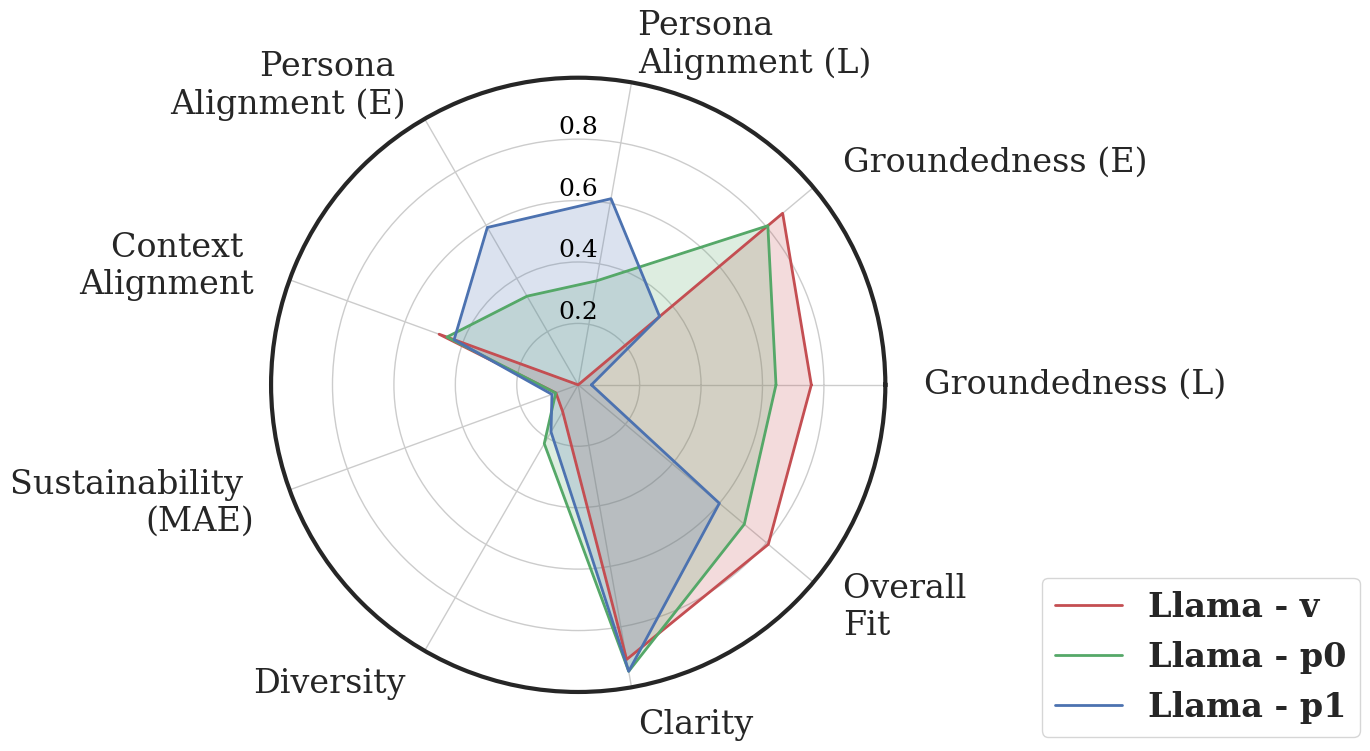

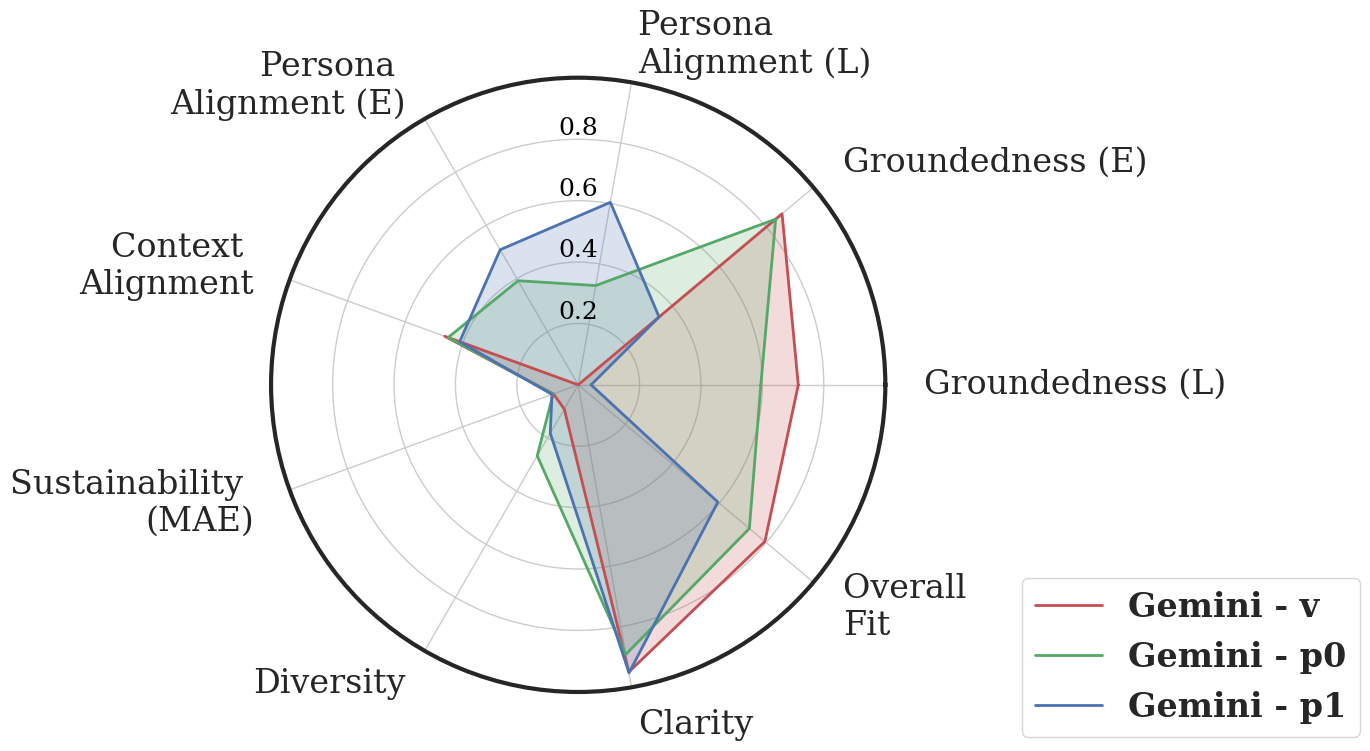

In [3]:
metrics = [
    'Groundedness (L)', 'Groundedness (E)',
    'Persona \nAlignment (L)', 'Persona \nAlignment (E)',
    'Context \nAlignment', 'Sustainability \n(MAE)', 'Diversity', 'Clarity', 'Overall \nFit'
]
num_metrics = len(metrics)

# Define models and settings
models = ['Llama', 'Gemini']
settings = ['v', 'p0', 'p1']

# Example scores (random values for illustration)
data = {
    'Llama': {
        'v': [0.759, 0.869, 0.0, 0.0, 0.482, 0.077, 0.101, 0.908, 0.808],
        'p0': [0.644, 0.806, 0.3438, 0.3333, 0.455, 0.078, 0.221, 0.947, 0.706],
        'p1': [0.043, 0.346, 0.61538, 0.59167, 0.430, 0.091, 0.177, 0.947, 0.600]
    },
    'Gemini': {
        'v': [0.717, 0.867, 0.0, 0.0, 0.463, 0.086, 0.091, 0.950, 0.794],
        'p0': [0.595, 0.840, 0.3284, 0.3917, 0.451, 0.087, 0.267, 0.892, 0.728],
        'p1': [0.042, 0.344, 0.6038, 0.5083, 0.411, 0.091, 0.182, 0.953, 0.594]
    }
}

# Function to create radar chart
def plot_radar_chart(data, model):
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # Repeat first value to close the chart
    
    set_paper_style()
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': 'polar'})  # Increased figure size
    fig.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.2)  # Adjust padding for better label visibility
    
    colors = ['r', 'g', 'b']
    for i, setting in enumerate(settings):
        values = data[model][setting]
        values += values[:1]  # Repeat first value to close the chart
        ax.plot(angles, values, label=f'{model} - {setting}', color=colors[i], linewidth=2)
        ax.fill(angles, values, alpha=0.2, color=colors[i])
        
        # # Add text labels for values
        # for angle, value in zip(angles, values):
        #     ax.text(angle, value + 0.03, f'{value:.2f}', ha='center', va='bottom', fontsize=18, color=colors[i])

    y_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticks(y_ticks)  # Set the y-ticks to match these values
    ax.set_yticklabels([])  # Remove default labels to avoid duplication

    # Choose an angle for the labels (typically 0 or π/2 for readability)
    angle_offset = np.pi / 2  # Position labels at the top

    # Add labels for each concentric circle
    for y in y_ticks:
        if y is 0 or y is 1:
            continue
        ax.text(angle_offset, y, f'{y:.1f}', ha='center', va='bottom', 
                fontsize=18, color='black')
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=24, rotation=30, ha='right')
    for label, angle in zip(ax.get_xticklabels(), angles):
        x, y = label.get_position()  # Get current position
        offset = -0.05  # Adjust this value for spacing
        label.set_position((x, y + offset))  # Move label outward
        
        # Adjust alignment dynamically
        if angle < np.pi / 2 or angle > 3 * np.pi / 2:  # Right side
            label.set_horizontalalignment('left')
        else:  # Left side
            label.set_horizontalalignment('right')
    # ax.set_title(f'Radar Chart for {model}', fontsize=14, fontweight='bold')
    # ax.legend(fontsize=10, markerscale=1, borderpad=0.5, labelspacing=0.5, handlelength=1, handleheight=1, loc='upper right')
    legend_properties = {'weight':'bold', 'size': 24}
    ax.legend(loc='lower right', bbox_to_anchor=(1.8, -0.1), prop=legend_properties)
    
    plt.tight_layout()  # Adjusts everything to fit well
    plt.savefig(f'plots/radarchart-{model}.pdf',bbox_inches='tight')
    plt.show()

# Plot radar charts for both models
plot_radar_chart(data, 'Llama')
plot_radar_chart(data, 'Gemini')


In [7]:
import shutil

src="plots/radarchart-Gemini.pdf"
dst="../../../latex/c-trs-umap25-paper/figures/radarchart-Gemini.pdf"

shutil.copyfile(src, dst)

# 2nd option
shutil.copy(src, dst)  # dst can be a folder; use shutil.copy2() to preserve timestamp

'../../../latex/c-trs-umap25-paper/figures/radarchart-Gemini.pdf'